In [35]:
# importing libraries
import ast
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_US = df[df['job_country']=='United States']

In [5]:
df_skills = df_US.explode('job_skills')
df_skills['job_skills']

0            None
3          python
3             c++
3            java
3          matlab
           ...   
785692          r
785703       None
785705        sql
785705     python
785705    tableau
Name: job_skills, Length: 1073565, dtype: object

In [10]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='count')
df_skills_count = df_skills_count.sort_values(by='count', ascending=False)
df_skills_count

,job_skills,job_title_short,count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [32]:
job_titles = ['Data Analyst', "Data Engineer", "Data Scientist"]

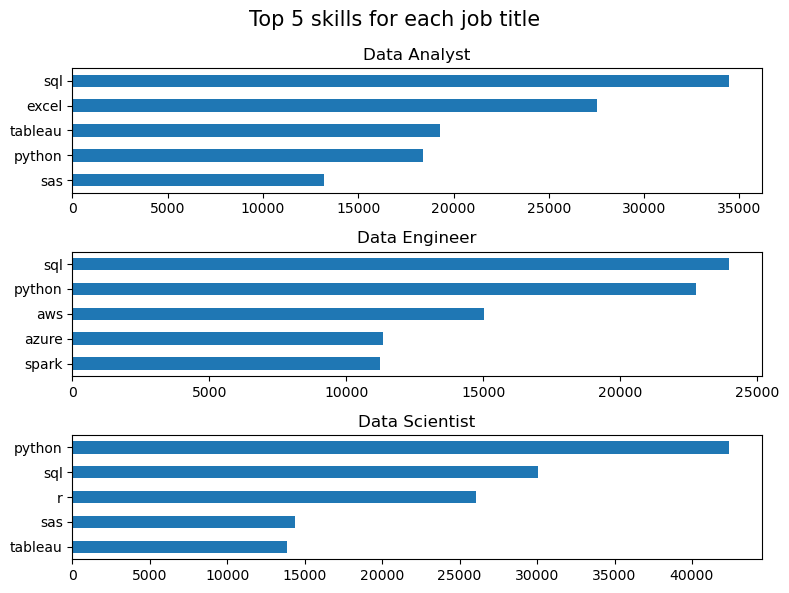

In [24]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, 6))

# Ensure ax is always iterable
if len(job_titles) == 1:
    ax = [ax]  # Convert single Axes object to a list

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Top 5 skills for each job title', fontsize=15)
plt.tight_layout()
plt.show()


In [26]:
df_job_title_count= df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [30]:
df_skills_perc=pd.merge(df_skills_count,df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percentage'] = df_skills_perc['count']/df_skills_perc['jobs_total']*100
df_skills_perc

,job_skills,job_title_short,count,jobs_total,skill_percentage
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


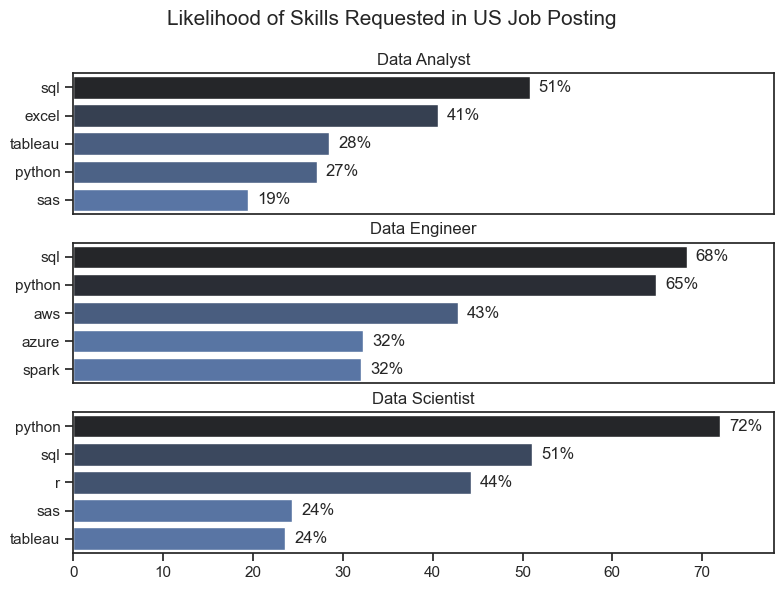

In [42]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, 6))

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind='barh', x='job_skills', y='skill_percentage', ax=ax[i], title=job_title)
    # 2nd way (usng seaborn to plot)
    sns.barplot(data=df_plot, x='skill_percentage', y='job_skills', ax=ax[i], hue='count', palette='dark:b_r') 
    # ax[i].invert_yaxis()
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)

    for n,v in enumerate (df_plot['skill_percentage']):
        ax[i].text(v + 1 ,n,f'{v:.0f}%', va='center')
    
    if i != len(job_titles) -1:
        ax[i].set_xticks([])   # Just making sure the x axis percentage value only appears in Data Scientist plot

fig.suptitle('Likelihood of Skills Requested in US Job Posting', fontsize=15)
plt.tight_layout(h_pad=0.5) # fix the overlap
plt.show()
